# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

 ### Introduction

The price of a new car in the industry is fixed by the manufacturer with some additional costs incurred by the
Government in the form of taxes. So, customers buying a new car can be assured of the money they invest to be worthy. But, due to the increased prices of new cars and the financial incapability of the customers to buy them, Used Car sales are on a global increase. Therefore, there is an urgent need for a Used Car Price Prediction system which effectively determines the worthiness of the car using a variety of features. Existing System includes a process where a seller decides a price randomly and buyer has no idea about the car and it’s value in the present day scenario. In fact, seller also has no idea about the car’s existing value or the price he should be selling the car at. To overcome this problem, a model is developed which will be highly effective. Regression Algorithms are used because they provide us with continuous value as an output and not a categorized value. Because of which it will be possible to predict the actual price of a car rather than the price range of a car.


In [4]:
# Import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style('whitegrid')
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [5]:
# loading and inspecting the data
data = pd.read_csv('data/toyota.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


    fig. Loading and Inspecting data
   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


    fig. a concise summary of a DataFrame
    
There are no missing values, since all columns have 6738 non-null entries, and this matches the length of the DataFrame. It is also seen that there are three columns with object data type, which are the categorical columns. The remaining columns are numerical. Categorical variables cannot be entered into the regression equation just as they are. Instead, they need to be recoded into a series of variables which can then be entered into the regression model. For this, OneHotEncoder will be used later.
   

In [7]:
print(data.corr())

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.420959 -0.727749  0.283455 -0.020607   -0.045567
price       0.420959  1.000000 -0.297936  0.214498 -0.039910    0.727592
mileage    -0.727749 -0.297936  1.000000 -0.205285  0.044889    0.182615
tax         0.283455  0.214498 -0.205285  1.000000 -0.430292    0.155727
mpg        -0.020607 -0.039910  0.044889 -0.430292  1.000000   -0.106868
engineSize -0.045567  0.727592  0.182615  0.155727 -0.106868    1.000000


    fig. finding the pairwise correlation of all columns in the dataframe

In [8]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


    fig. Different statistical aggregations:computing a summary of statistics pertaining to the DataFrame 
         columns
       
The dataset has cars from 2020 going all the way back to 1998, although the mean is around 2016, and the 25% quantile is 2016, so most of the cars in the dataset are quite new. This is also reflected in the mileage, where the mean and median are both around 20,000 miles, but the most extreme value is around 175,000 miles. Prices range all the way around  60,000,althoughmostofthepricesseemstobearound 10,000. "mpg" has mean and median around 60 mpg, but there appears to be some larger values up to 235 mpg. The road tax and engine size columns both have values of 0, which is likely due to wrong or missing data that need to be treated either by performing mean imputation or by dropping

In [9]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

    fig. returning the number of missing values in the data set.

This function is expected to return the number of missing values in the data set. As for every features, count is "0", it can be assured that there is no any null entries.

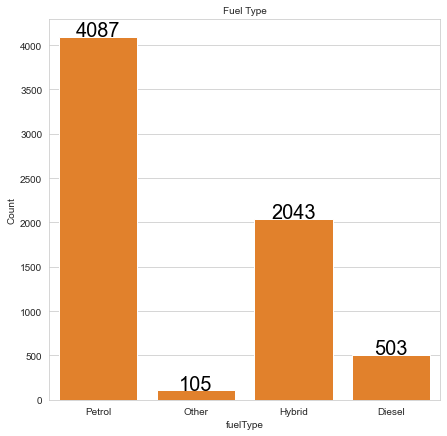

In [10]:
plt.figure(figsize=(7,7))
base_color=sns.color_palette()[1]
sns.countplot(data=data, x='fuelType',color=base_color)
plt.title('Fuel Type',fontsize=10)
plt.ylabel('Count',fontsize=10)

locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = data['fuelType'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=20)

    fig. Calculating the total number of each type of fuels to determine which sells at more price.

The above plot illustrates that petroleum-based fuel is used in higher percentage, which is followed by Hybrid one.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Other')])

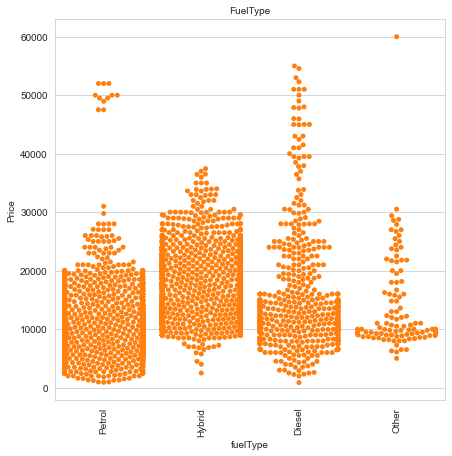

In [11]:
plt.figure(figsize=(7,7))
sns.swarmplot(data=data,x='fuelType',y='price',color=base_color,order=data.fuelType.value_counts().index);
plt.title('FuelType',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.xticks(fontsize=10,rotation=90)

    fig. Swarmplot: Determining which fuel cost more
    
It is seen that dataset contains mostly Hybrid ranging price till 22000 followed by Petrol, which also seems to have more data items towards the more expensive prices, although latter one counts more.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Other')])

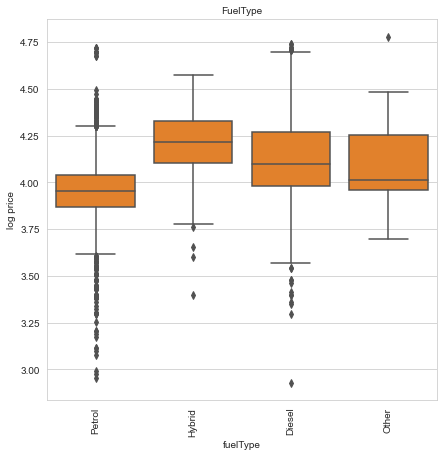

In [12]:
data_log = data.copy()
plt.figure(figsize=(7,7))
data_log["log price"] = np.log10(data_log["price"])
data_log = data_log.drop("price", axis="columns")

sns.boxplot(data=data_log,x='fuelType',y='log price',color=base_color,order=data.fuelType.value_counts().index);
plt.title('FuelType',fontsize=10)
plt.ylabel('log price',fontsize=10)
plt.xticks(fontsize=10,rotation=90)

    fig. Boxplot: log value of price vs fuelType
    
In the above figure, taking log values of price, which is a continous target variable, our model can now learn by what amount relative to a base price a car’s value will change based on adding or removing this or that feature.

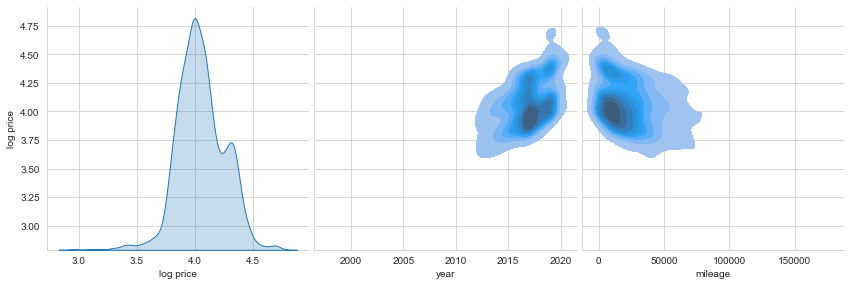

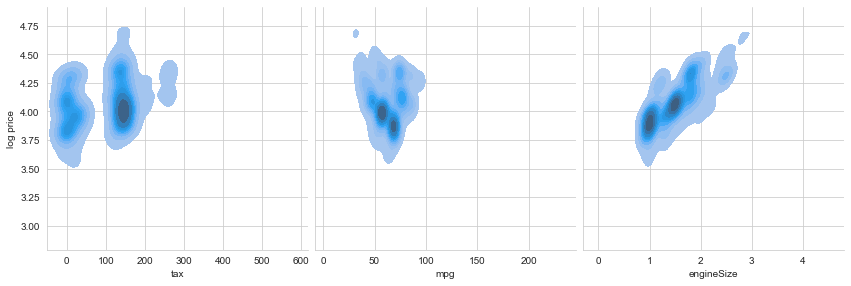

In [13]:
def splitplot(data, x_vars, **kwargs):
    len_x = len(x_vars)
    for x_vars_ in (x_vars[: len_x // 2], x_vars[len_x // 2 :]):
        sns.pairplot(data, x_vars=x_vars_, **kwargs)


splitplot(
    data_log,
    x_vars=["log price","year", "mileage", "tax", "mpg", "engineSize"],
    y_vars=["log price"],
    kind="kde",
    height=4.0,
    aspect = 1,
    plot_kws={"fill": True})

     fig. Pairplot: Finding the relationship between the Target variable vs other attributes

These plots reveal that there appears to be a linear relationship between the logarithm of the price, and both year and mileage. Also, the KDE plot shows that there might be a weak linear relationship between engine size and log price, which was less visible in the scatter plot. There is no obvious relationship between the price and the remaining variables, whether we consider its logarithm or not. Based on these plots, going forward in the analysis, the log price as the target variable is supposed to be used.

<AxesSubplot:xlabel='transmission', ylabel='count'>

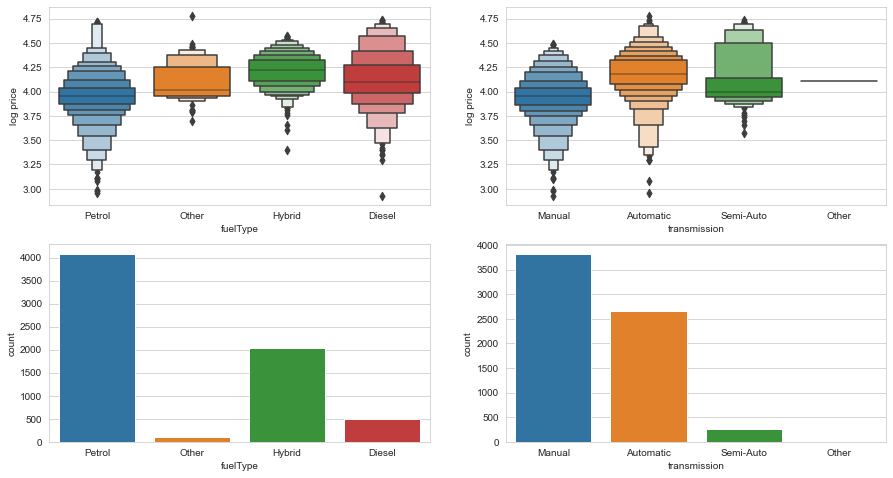

In [14]:
def plot_boxen_and_count(x, y, data, axes):
    sns.boxenplot(x=x, y=y, data=data, ax=axes[0], scale="linear")
    count_values = sns.countplot(x=x, data=data, ax=axes[1])
    return count_values
fig, axes = plt.subplots(2, 2, figsize=[15, 8])

plot_boxen_and_count(y="log price", x="fuelType", data=data_log, axes=axes[:, 0])
plot_boxen_and_count(y="log price", x="transmission", data=data_log, axes=axes[:, 1])


    fig. Boxenplot: Finding the relationship between the logarithm of the price, and both fuelType and 
          transmission.
From these plots, it is seen that there are many petrol and hybrid cars, only few diesel cars, and very few “other” cars. The low number of “other” cars means that it could be difficult to make good predictions for these types of cars, more about this later in the data cleaning section. The distribution of prices over the different fuel types appears to be fairly regular and somewhat close to normal distributions. The mean of the distributions all appear to be fairly close, which would make it difficult for a linear model to distinguish these categories.

From the count plots, it appears that manual transmission cars are generally a bit cheaper than the other two types, all of which seems quite reasonable.

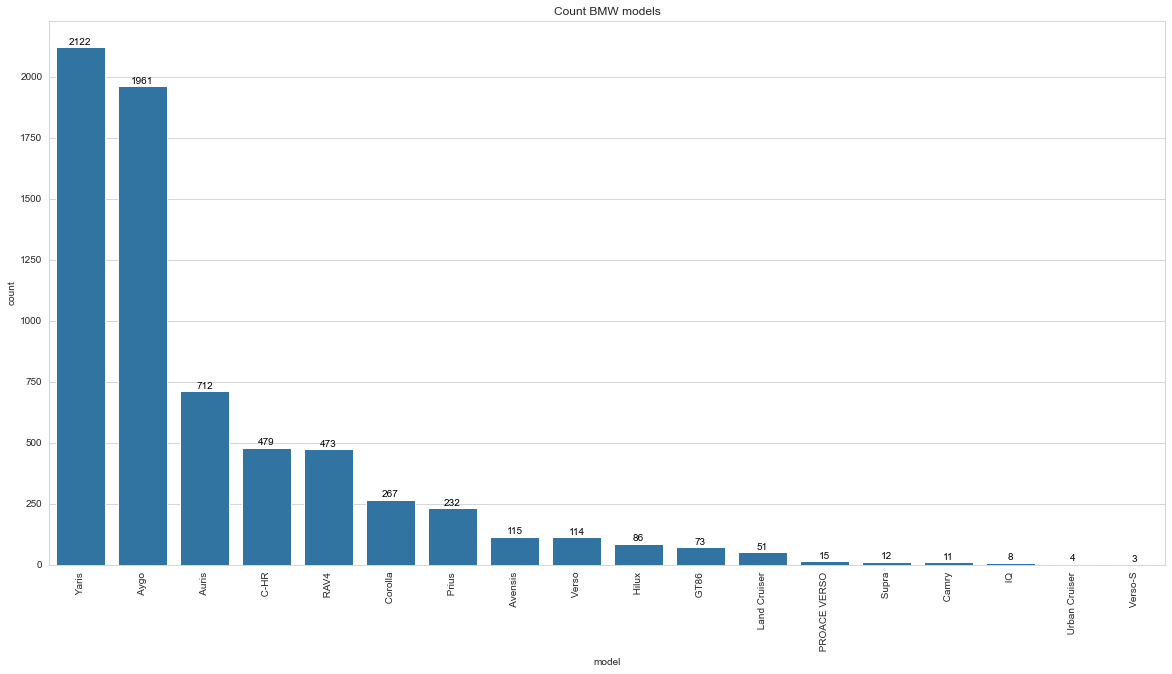

In [15]:
plt.figure(figsize=(20,10))
color=sns.color_palette()[0]
sns.countplot(data=data,x='model',color=color,order=data.model.value_counts().index);
plt.xticks(rotation=90);
plt.title('Count BMW models');

locs, labels = plt.xticks() # get the current tick locations and labels

# add annotations


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = data.model.value_counts()[label.get_text()]
  
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black')

                     fig. Visualizing different models of car through countplot
The distribution of most of the models show a one- or two-peak structure, with various mean values, which should make it possible for a linear model to somewhat distinguish between them.

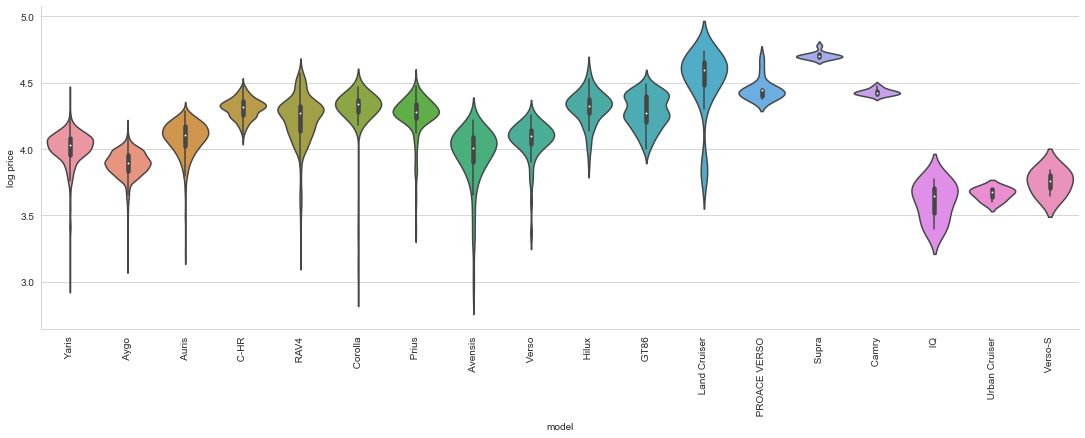

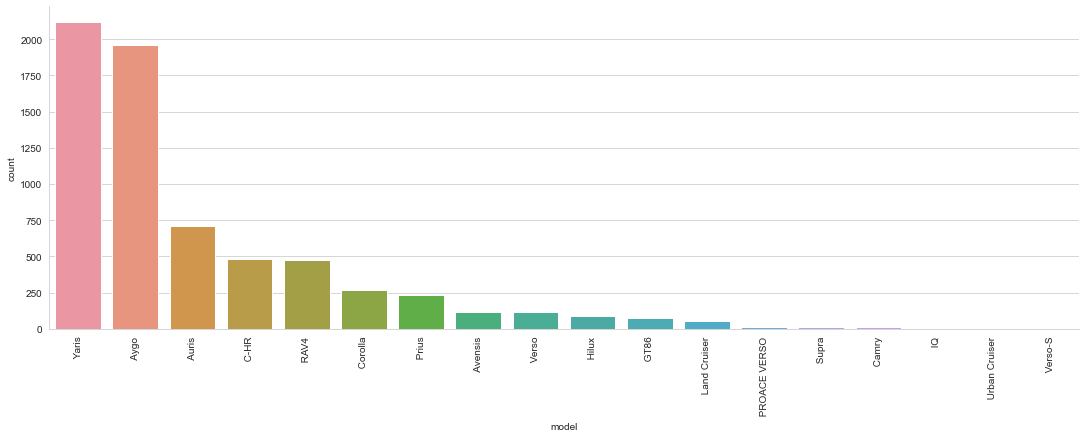

In [16]:
model_count = data_log.groupby("model")["model"].count()
model_count.name = "model count"
car_sorted_model_count = (
    data_log.merge(model_count, on="model")
    .sort_values("model count", ascending=False)
    .drop("model count", axis="columns")
)
g = sns.catplot(x="model", y="log price", data=car_sorted_model_count, kind="violin", aspect=3, scale='width')
g.set_xticklabels(rotation=90)
g = sns.catplot(x="model", data=car_sorted_model_count, kind="count", aspect=3)
g.set_xticklabels(rotation=90)

                     fig. Visualizing different models of car through violinplot and countplot
The distribution of most of the models show a one- or two-peak structure, with various mean values, which should make it possible for a linear model to somewhat distinguish between them.

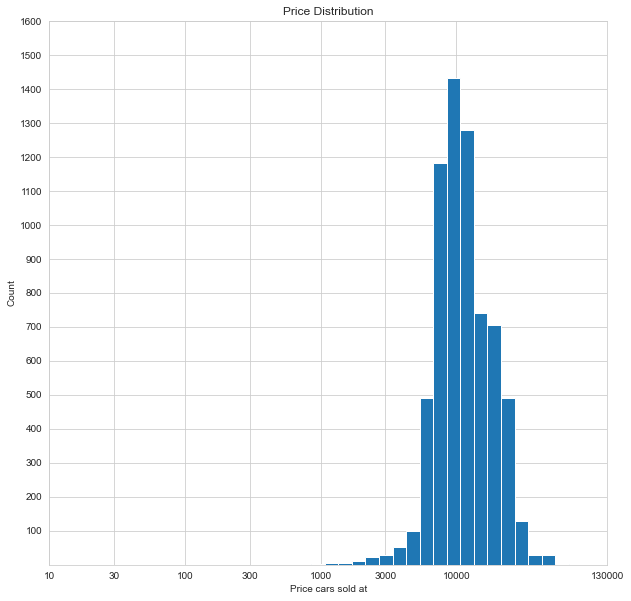

In [17]:
plt.figure(figsize=(10,10))
bin_edges = 10 ** np.arange(np.log10(data.price.min()), np.log10(data.price.max())+0.1, 0.1);
plt.hist(data=data,x='price',bins=bin_edges);
plt.xscale('log');
tick_locs = [10, 30, 100, 300, 1000, 3000,10000,130000];
ticks=np.arange(100,1700,100);
plt.xticks(tick_locs, tick_locs);
plt.yticks(ticks,ticks)
plt.xlabel('Price cars sold at');
plt.title('Price Distribution');
plt.ylabel('Count');

             fig. Visualizing the number of car sales and their amount with histogram
With regards to histogram distribution, it can be noted that around 2,000 cars are sold at a price of around 30k to 1 lakh. Below price of around 2,800 and above 1 lakh there are no any sales.

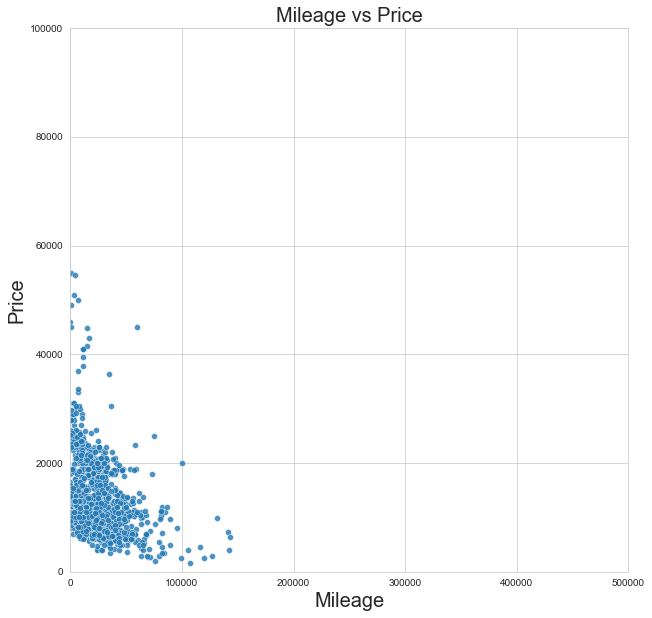

In [18]:
plt.figure(figsize=(10,10));
sns.scatterplot(data=data.sample(1500),x='mileage',y='price',alpha=0.8);
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=20);
plt.ylabel('Price',fontsize=20);
plt.title('Mileage vs Price',fontsize=20);

              fig. Scatterplot: Mileage vs log price
It can be noted that price between 7000 to 21000 contains the most used cars. Less the mileage, more it's value.

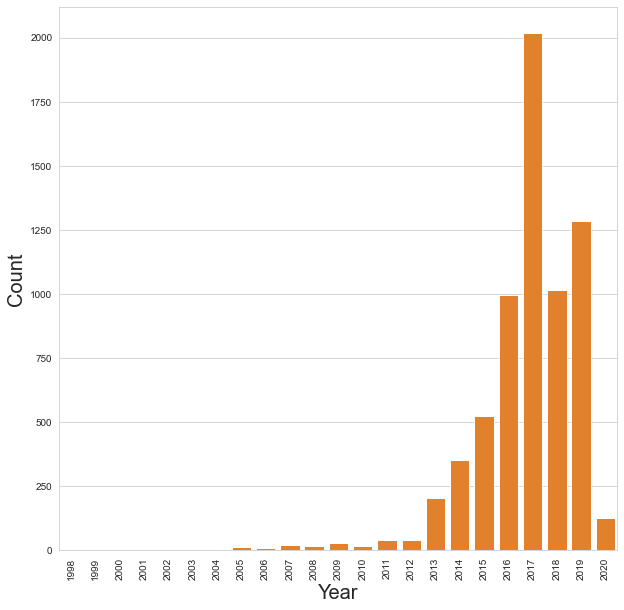

In [19]:
plt.figure(figsize=(10,10));
sns.countplot(data=data,x='year',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Year',fontsize=20);
plt.ylabel('Count',fontsize=20);

     fig. Countplot to determine which year has greater percentage of sales. 
It can be noted that in 2017, there were many consumers who preferred to buy used cars. Surprisingly, in 2020, used car market was down. To visualize more, we will need more latest data on it.

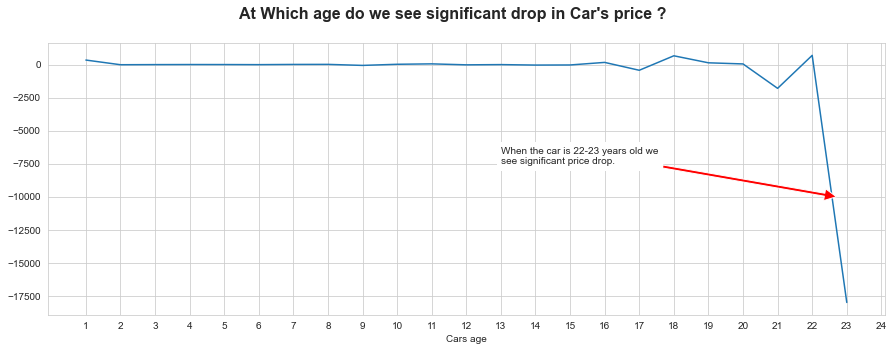

In [20]:
data['Cars age'] = dt.datetime.now().year - data['year']
n = data[['Cars age','price']]
# setting mileage as index
n.set_index("Cars age",inplace = True)
# sorting the values
n = n.sort_values("Cars age")
# getting the price shift
n['price_shift'] = n['price'].shift(1)
n['diff'] = n['price_shift']-n['price']
n.reset_index(inplace = True)
# grouping by mileage and diff and plotting
n.groupby('Cars age').mean()['diff'].plot(figsize = (15,5))
plt.xticks(np.arange(1,25,1))
# annotating the plot
plt.annotate("""When the car is 22-23 years old we
see significant price drop.""",
xy = (22.7,-10000),xytext = (13,-7500),
arrowprops = {'facecolor':'red','width':3},
backgroundcolor = 'white')

plt.suptitle("At Which age do we see significant drop in Car's price ?",fontsize = 16, weight = "bold")
plt.show()

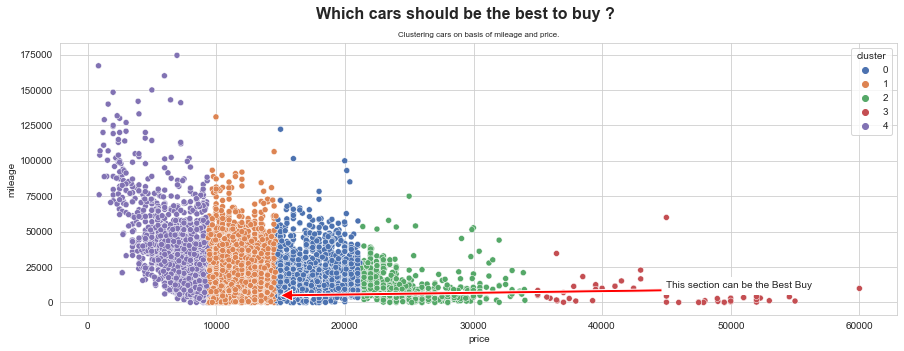

In [21]:
# Which models are of the best value ?
# it will contain cars which have lower price and lower mileage.
cluster_data = data[['price','mileage','model']]
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5,random_state = 90)
m= km.fit(np.array(cluster_data['price']).reshape(-1,1),
np.array(cluster_data['mileage']).reshape(-1,1))
cluster_data = cluster_data.assign(cluster = km.labels_)
cluster_data.head(3)
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'price',y = 'mileage',hue = 'cluster',data=cluster_data,palette="deep")
plt.annotate("This section can be the Best Buy",xy = (15000,5000),xytext = (45000,10000),
arrowprops = {'facecolor':'red','width':3},
 backgroundcolor = 'white')
plt.title("Clustering cars on basis of mileage and price.",fontsize = 8)
plt.suptitle("Which cars should be the best to buy ?",fontsize = 16,weight = 'bold')
plt.show()

         fig. Which models are of best value?
From the figure, it’s clear that it is good to select a car with low cost and low mileage. So, cars belonging to cluster between 1 and 4, will be the best buy in terms of mileage mileage and price.

In [22]:
from pandas.api.types import is_numeric_dtype
for c in data.columns:
    if(is_numeric_dtype(data[c])):
        k= data[c][data[c]==0].count()
        if(k):
            print(f"{c} has {k} zero values (Not Good)")
        else:
            print(f"{c} has No zero values (Great!)")
    else:
        for name, count in data.groupby(c)[c].count().iteritems():
            if(c=="fuelType"):
                if(count < 50):
                    print(f"{name} of the {c} feature has {count} data(Not Enough!)")
            else:
                if(count < 25):
                    print(f"{name} of the {c} feature has {count} data (Not Enough!)")

 Camry of the model feature has 11 data (Not Enough!)
 IQ of the model feature has 8 data (Not Enough!)
 PROACE VERSO of the model feature has 15 data (Not Enough!)
 Supra of the model feature has 12 data (Not Enough!)
 Urban Cruiser of the model feature has 4 data (Not Enough!)
 Verso-S of the model feature has 3 data (Not Enough!)
year has No zero values (Great!)
price has No zero values (Great!)
Other of the transmission feature has 1 data (Not Enough!)
mileage has No zero values (Great!)
tax has 1790 zero values (Not Good)
mpg has No zero values (Great!)
engineSize has 6 zero values (Not Good)
Cars age has No zero values (Great!)


    fig. Identifying features having more "O" values and sub-categories that are less in number
These values (both not enough and not good) could seriously skew a model since they will not be able to predict price from on their categories. So, it's best to eliminate these values, either by imputing with e.g. average, or by dropping the records all together.

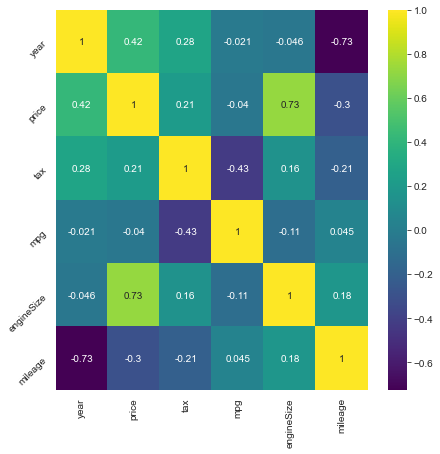

In [23]:
plt.figure(figsize= (7,7))
col = ["model", "year", "price", "transmission", "tax", "mpg", "engineSize", "fuelType", "mileage"]
sns.heatmap(data = data[col].corr(), annot = True, cmap = 'viridis')
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10, rotation = 45)
plt.show()

     fig. HeatMap: Visualizing the strong and weak correlation between target varaible and other attributes
We see the price variable has a decent correlation with the other quantitative variables as shown above.

In [24]:
remove_columns = (data.engineSize == 0) | (data.tax == 0) | (data.model == "Camry")| (data.model == "IQ") |  (data.model == "PROACE VERSO") | (data.model == "Urban Cruiser")| (data.model == "Supra") |(data.model == "Verso-S") | (data.transmission == "Other") 
data1 = data.copy(deep = True)
data1 = data1[~remove_columns]
data1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Cars age
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,5
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,4
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,6
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,4
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,4
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,10
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,10
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,9
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,10


       fig. Data Cleaning: Dropping features that are incapable to perform prediction

In [25]:
data1["log price"] = np.log10(data1["price"])
data1 = data1.drop("price", axis = "columns")
data1

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Cars age,log price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,5,4.204120
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,4,4.203984
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,6,4.146066
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,4,4.278708
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,4,4.242988
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,Automatic,30000,Petrol,20,58.9,1.0,10,3.740363
6734,Urban Cruiser,2011,Manual,36154,Petrol,125,50.4,1.3,10,3.697665
6735,Urban Cruiser,2012,Manual,46000,Diesel,125,57.6,1.4,9,3.698535
6736,Urban Cruiser,2011,Manual,60700,Petrol,125,50.4,1.3,10,3.601517


      fig. Visualizing dataframe after taking log value of price

In [26]:
data2 = data1.copy(deep = True)
data2

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Cars age,log price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,5,4.204120
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,4,4.203984
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,6,4.146066
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,4,4.278708
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,4,4.242988
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,Automatic,30000,Petrol,20,58.9,1.0,10,3.740363
6734,Urban Cruiser,2011,Manual,36154,Petrol,125,50.4,1.3,10,3.697665
6735,Urban Cruiser,2012,Manual,46000,Diesel,125,57.6,1.4,9,3.698535
6736,Urban Cruiser,2011,Manual,60700,Petrol,125,50.4,1.3,10,3.601517


    fig. Trying to preserve old dataframe while working with new one.

### Regression models
In the initial data analysis, it is seen that the relationship between the logarithm of the price and both year and mileage appears to be linear, so in this section training of linear model, with those data, is done. R^2 score is to be used to perform feature selection, evaluate whether overfitting is taking place, and to evaluate overall performance of the models.

In [27]:
# Split into train and test sets
#hold out 33% percent of the data for validation before training any mode
data2_train, data2_val = train_test_split(data2, test_size=0.33, random_state=42)

In [28]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, make_column_transformer

In [29]:
def oneHotFunction(drop="first"):
  
    tuplevariable = (
        OneHotEncoder(drop=drop),
        make_column_selector(dtype_include="object"),
    )
    ohe = make_column_transformer(tuplevariable, remainder="passthrough")
    return ohe

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LinearRegression
def Linear_OneHotFunction(drop="first"):
    linreg = Pipeline(
        (("one_hot", oneHotFunction(drop=drop)), ("regressor", LinearRegression()))
    )
    return linreg

lr = Linear_OneHotFunction()

    fig. Applying OneHotEncoder to categorical variables, before passing the data onto a linear regressor

OneHotEncoder is used to deal with the categorical variables in the data. The linear regression is only able to deal with numerical variables, so in order to treat categorical variables where there is no numerical relation between the categories, one hot encoding creates new features for every category, where the value in each of the new features is one for records with that category, but zero otherwise.

In [30]:
def split(data, dependent = "log price"):
    features = [f for f in data.columns if f != dependent]
    return data[features], data[dependent]
X, y = split(data2_train[["log price", "year", "engineSize"]], dependent = "log price")

### Working on Different Performance Metrics and finding the best one

As a start, I test this model with the first data model, including only engineSize and year as features, with cross validation. This splits the data into five blocks, trains on the first four blocks combined and tests against the last block. This is repeated 4 times, where each time a new block is used for testing, and the remaining blocks are used for training. This helps check that the score is not artificially high or low due to some particular test/train split.

In [31]:
score = cross_validate(lr,X, y, return_train_score = True)
pd.DataFrame(score)[["test_score", "train_score"]]

,test_score,train_score
0,0.821781,0.806159
1,0.799394,0.811404
2,0.808098,0.809878
3,0.783752,0.816141
4,0.829495,0.804322


The R^2 values from the cross validation are fairly consistent across the cross validation folds, and has values around 0.81 (the closer to 1, the better), indicating that this is almost a fit.

In [32]:
#Adding more features to determine model's performance. 
cols = data2.columns
data2_reduced = data2[cols]
data2_train_reduced = data2_train[cols]
data2_val_reduced = data2_val[cols]
X, y = split(data2_train_reduced, dependent = "log price")
lr.fit(X,y)
x_val, y_val = split(data2_val_reduced, dependent = "log price")
y_val_predicted = lr.predict(x_val)
r2Score = r2_score(y_val, y_val_predicted)
L = r2Score
L

0.9541485456027221

This r2_Score value of 0.954 determines the best fit of the model as compared to before.

In [33]:
from sklearn.metrics import mean_squared_error as mse , r2_score

results = x_val.copy()
results["predicted"] = lr.predict(x_val)
results["actual"]= y_val.copy()
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
151,4.347,4.332236
807,3.978,4.041195
621,4.028,4.056714
5529,3.918,3.954001
5553,4.057,4.041195
...,...,...
5568,3.863,3.770852
5478,3.880,3.862728
4740,3.826,3.875061
2745,3.980,4.021189


In [35]:
from sklearn import metrics
y_test = results['actual']
y_pred = results['predicted']

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.030636974410959476
Mean Squared Error: 0.0021801571275155383
Root Mean Squared Error: 0.04669215274021469


     fig. Performance Metrics: determining the true picture of prediction quality 
The lesser the Mean Absolute Error and Root Mean Squared Error and more the r_score (0.954), the better the model is. The values here proves itself, how accurate the predicion would be. Great!!!

In [36]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor

def DecisionTree_OneHotEncoder(drop="first"):
    DecisionTree_OneHot = Pipeline((
    ("one_hot", oneHotFunction(drop=drop)), 
      ("regressor", DecisionTreeRegressor()),
  ))
    return DecisionTree_OneHot

DecisionTree_OneHot = DecisionTree_OneHotEncoder()
x, y = split(data2_train_reduced, dependent = "log price")
DecisionTree_OneHot.fit(x,y)
x_val, y_val = split(data2_val_reduced, dependent = "log price")
y_val_predict = DecisionTree_OneHot.predict(x_val)
D= r2_score(y_val, y_val_predict)
D 

0.9290999936987483

      fig. Using DecisionTreeRegressor to determine the values of r2_score
It's less than Value of LinearRegression but still it's a good value.

In [37]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse , r2_score

results = x_val.copy()
results["predicted"] = DecisionTree_OneHot.predict(x_val)
results["actual"]= y_val.copy()
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results
y_test = results['actual']
y_pred = results['predicted']

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03803209362739109
Mean Squared Error: 0.0033727791661007475
Root Mean Squared Error: 0.05807563315281847


In [39]:
### RandomForest

from sklearn.ensemble import RandomForestRegressor

def RandomForest_OneHotEncoder(drop="first"):
    RandomForest_OneHot = Pipeline((
      ("one_hot", oneHotFunction(drop=drop)), 
      ("regressor", RandomForestRegressor()),
  ))
    return RandomForest_OneHot

RandomForest_OneHot = RandomForest_OneHotEncoder()
x, y = split(data2_train_reduced, dependent = "log price")
RandomForest_OneHot.fit(x,y)
x_val, y_val = split(data2_val_reduced, dependent = "log price")
y_val_predict = RandomForest_OneHot.predict(x_val)
R =r2_score(y_val, y_val_predict) 
R

0.9543487452064752

     fig. Using Random Forest Regressor to determine the value of r2_score
It's as good as the value of LinearRegression. Now, we can determine our model is best fit using LinearRegressor and RandomRegressor, followed by DecisionTree Regressor, which is still not bad

In [40]:
from sklearn.metrics import mean_squared_error as mse , r2_score

results = x_val.copy()
results["predicted"] = RandomForest_OneHot.predict(x_val)
results["actual"]= y_val.copy()
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results
y_test = results['actual']
y_pred = results['predicted']

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03023370310322628
Mean Squared Error: 0.0021698579659492553
Root Mean Squared Error: 0.04658173425227162


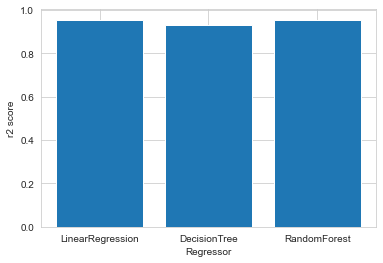

In [41]:
y = np.array([L,D,R])
x = ["LinearRegression", "DecisionTree", "RandomForest"]
plt.bar(x,y)
plt.xlabel('Regressor')
plt.ylabel('r2 score')
#plt.xticks(rotation = 90, scale = 9)
plt.show()

    fig. Comparision of r2_score values on different regression models

### Prediciting the price value by giving different inputs using different Regression Models


In [53]:
#Predicting price

def find_largest_element(keys):
    return keys[np.argmax(list(map(len, keys)))]
    
def scalar_to_list(x):
    if(np.isscalar(x)):
        return [x]
    else:
        return x 
def predict(models, **Kwargs):
    features = find_largest_element(list(models.keys()))
    provided_features = tuple(f for f in features if f in Kwargs)
    model_holder = models[provided_features]
    model = model_holder["model"]
    values = (scalar_to_list(Kwargs[f]) for f in provided_features)
    X = pd.DataFrame(
    dict (
    zip(
       provided_features,values  
    ))
    )
    predicted_price = pd.DataFrame({
   # "model": X["model"], "transmission": X["transmission"], "price": np.power(10, model.predict(X))
    "year": X["year"], "model": X["model"], "engineSize": X["engineSize"],"mileage":X["mileage"], "price": np.power(10, model.predict(X))
    })
    return predicted_price
from itertools import chain, combinations
def powerset(features, start = 0):
    return chain.from_iterable(combinations(list(features),r) for r in range(start,len(list(features)) +1))
def training_the_model_Linear(feature, data, dependent= "log price"):
    models = {}
    for col in powerset(feature, start = 1):
        X = data[list(col)]
        y= data[dependent]
        Linear_OneHot = Linear_OneHotFunction()
        Linear_OneHot.fit(X,y)
        models[col] = {"model": Linear_OneHot}
    return models

def training_the_model_Decision(feature, data, dependent= "log price"):
    models = {}
    for col in powerset(feature, start = 1):
        X = data[list(col)]
        y= data[dependent]
        DecisionTree_OneHot = DecisionTree_OneHotEncoder()
        DecisionTree_OneHot.fit(X,y)
        models[col] = {"model": DecisionTree_OneHot}
    return models

def training_the_model_RandomForest(feature, data, dependent= "log price"):
    models = {}
    for col in powerset(feature, start = 1):
        X = data[list(col)]
        y= data[dependent]
        RandomForest_OneHot = RandomForest_OneHotEncoder()
        RandomForest_OneHot.fit(X,y)
        models[col] = {"model": RandomForest_OneHot}
    return models
#models_Linear= training_the_model_Linear((["model", "transmission"]), data2_reduced)
models_Linear= training_the_model_Linear((["model", "mileage", "engineSize", "year"]), data2_reduced)
#models_Decision= training_the_model_Decision((["model", "transmission"]), data2_reduced)
models_Decision= training_the_model_Decision((["model", "mileage", "engineSize", "year"]), data2_reduced)
models_RandomForest= training_the_model_RandomForest((["model", "mileage", "engineSize", "year"]), data2_reduced)
#models_RandomForest= training_the_model_RandomForest((["model", "transmission"]), data2_reduced)


In [55]:
predicted_value =predict(models_Linear, year=[2004, 2018], mileage= [5000,1000],engineSize=[2.0, 3.0],model= 2*[" IQ"])
display("Influence of Mileage, Model, EngineSize and Year on Price")

print("----------------------------------------------------")
display("Price of your car   is:")
print("====================================================")

predicted_value

'Influence of Mileage, Model, EngineSize and Year on Price'

----------------------------------------------------


'Price of your car   is:'

,year,model,engineSize,mileage,price
0,2004,IQ,2.0,5000,4753.478970
1,2018,IQ,3.0,1000,25480.468587


In [45]:
predicted_value=predict(models_Decision, year=[2004, 2018], mileage= [5000,1000],engineSize=[2.0, 3.0],model= 2*[" IQ"])
display("Influence of Mileage, Model, EngineSize and Year on Price")

print("----------------------------------------------------")
display("Price of your car   is:")
print("====================================================")

predicted_value

'Influence of Mileage, Model, EngineSize and Year on Price'

----------------------------------------------------


'Price of your car   is:'

,year,model,engineSize,mileage,price
0,2004,IQ,2.0,5000,6695.0
1,2018,IQ,3.0,1000,25980.0


In [46]:
predicted_value =predict(models_RandomForest, year=[2004, 2018], mileage= [5000,1000],engineSize=[2.0, 3.0],model= 2*[" IQ"])
display("Influence of Mileage, Model, EngineSize and Year on Price")

print("----------------------------------------------------")
display("Price of your car   is:")
print("====================================================")

predicted_value

'Influence of Mileage, Model, EngineSize and Year on Price'

----------------------------------------------------


'Price of your car   is:'

,year,model,engineSize,mileage,price
0,2004,IQ,2.0,5000,3880.515727
1,2018,IQ,3.0,1000,24510.480290


### Conclusion

The goal of this case study was to create an efficient and effective model for predicitng the accurate price of a used car based on user’s inputs (model, transmission, year, so on).

Firstly, a thorough analysis on each attribute of the used car datasets was done. To have a clean dataset for model building, entries containing NULL/invalid attributes were removed and anomalies were filtered out. After data cleaning and filtering, linear regression as a machine learning algorithm was used to build models to predict the used car price, which was compared with other two models; Random Forest and Decision Tree. For It was shown that, the linear model and random forest outperforms than decision tree regressor. The result shows that there is a positive correlation between year of registration and mileage and a negative correlation between price and year of registration. Also, we found that the linear regression best fits for this type of relevant problem, followed by Random Forest, while compared to other models, giving r2_score value of 0.954, 0.92, so the model seems to be fairly accurate. And then, predicting price based on the features on which consumers can reply on. This r2_Score is able to provide information about the goodness of fit of a model i.e. it acts as a strong evidence to prove how well this regression model is able to predict the real data points. Mean Absolute Error and Root Mean Squared Error is able to provide the true picture of prediction quality as it's value are more less than 0.3 (lower the MSE value, the accuracy of prediction is much higher). To better understand what features models are using when making predictions, we did some further analysis on feature importance. The results aligned with our expectation and revealed some interesting difference in how different models make predictions.This proves that there is an excellent match between the actual and predicted data set. So, our performance metrics is able to fianlize that our predcition based on models is almost accurate enough to help consumers for investing on cars being comfortable.

The data had some issues, most notably in the mpg, tax and engineSize variables, which contained some non-sensical or suspicious values. Also, I would have expected that the mpg and tax features should be predictable from the car model and related info, but this did not appear to be the case. These issues should be followed up with the data collection team.

Going forward, it might be possible to achieve better agreement with the data using other, more complicated models, such as neural networks, but one should be very careful about overfitting, since increased complexity of the model increases the risk of that. Also, in such models it would be more difficult to make clear interpretations of the coefficients, and they thus provide less explainability.

### Future Work
Some future directions include understanding better the reason behind the performance difference between different models, which exists and might be accurate and potentially to develop a web application to host the model,with a hope to provide freedom for users to search all the available cars at one place without moving anywhere, anytime. More specifications need to be added in a system or providing more accuracy in terms of price in the system i.e. Horsepower, Battery power, Suspension, Cylinder, Torque, Origin of Car, Accident History, Servicig history, information obtained from car's event data recorder, no of times inspection done by experienced toyota technicians/mechanics and so on. As we know that technologies are improving day by day and there is also advancement in car technology, so this model should be updated in a way it starts predicting on electric and Driverless cars too.